# Лабораторная работа № 1. Предварительная обработка данных
#### Выполнила: Гуськова Елизавета
#### Группа: 16-В-1
#### Цель лабораторной работы – получение навыков работы с библиотеками анализа данных, предварительной обработки данных, средствами визуализации.
#### Вариант 3. Вторичный рынок машин

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy import stats
%matplotlib inline

dF = pd.read_csv('C:\\student\\lab\\autos.csv', encoding = "ISO-8859-1")
dF.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [28]:
dF.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


In [29]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [30]:
dF.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [31]:
dF

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [32]:
dF.shape

(371528, 20)

### 1. Удалите столбцы, ценность которых для оценки стоимости машины низка.

In [33]:
dF.drop(dF.columns[[0,2,3,16,17,18,19]], axis=1, inplace=True)

In [34]:
dF

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja
6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein
7,VW_Derby_Bj_80__Scheunenfund,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein
8,Ford_C___Max_Titanium_1_0_L_EcoBoost,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN
9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN


### 2. Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.

In [35]:
dF.shape

(371528, 13)

In [36]:
dF = dF.dropna()
dF = dF.drop_duplicates()
dF.shape

(256901, 13)

In [37]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256901 entries, 3 to 371527
Data columns (total 13 columns):
name                   256901 non-null object
price                  256901 non-null int64
abtest                 256901 non-null object
vehicleType            256901 non-null object
yearOfRegistration     256901 non-null int64
gearbox                256901 non-null object
powerPS                256901 non-null int64
model                  256901 non-null object
kilometer              256901 non-null int64
monthOfRegistration    256901 non-null int64
fuelType               256901 non-null object
brand                  256901 non-null object
notRepairedDamage      256901 non-null object
dtypes: int64(5), object(8)
memory usage: 27.4+ MB


### 3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. 

In [38]:
dF = dF[(dF.yearOfRegistration > 2007) & (dF.yearOfRegistration<2013)]
dF = dF[(dF.price > 15000) & (dF.price < 50000)]
dF = dF[(dF.powerPS > 120) & (dF.powerPS < 150)]
dF

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
500,Ford_Galaxy_2.0_TDCI_Trend_EZ_04.12_Anhaengerk...,16500,test,bus,2012,manuell,140,galaxy,80000,4,diesel,ford,nein
776,Volkswagen_Golf_Cabrio_1.4_TSI,18000,control,cabrio,2012,manuell,122,golf,20000,6,benzin,volkswagen,nein
801,Ford_Galaxy_2.0_TDCi_DPF_Aut._Titanium_GROSS_NAVI,15900,test,bus,2011,automatik,140,galaxy,125000,4,diesel,ford,nein
1393,Opel_Astra_1.4_Turbo_Sports_Tourer_ecoFLEX_Sta...,16990,test,kombi,2012,manuell,140,astra,40000,7,benzin,opel,nein
2048,BMW_318d_DPF_Touring_Aut.,15799,test,kombi,2011,automatik,143,3er,150000,3,diesel,bmw,nein
2059,BMW_318d_DPF_Touring_Aut._Leder_Navi_AHK,15700,test,kombi,2011,automatik,143,3er,100000,6,diesel,bmw,nein
2064,Hyundai_i40cw_1.7_CRDi_Automatik,17900,test,kombi,2012,automatik,136,i_reihe,60000,5,diesel,hyundai,nein
2066,Volkswagen_T5_California_Beach__gepflegt_aus_1...,35890,test,bus,2012,manuell,140,transporter,90000,9,diesel,volkswagen,nein
2140,BMW_118,19450,test,cabrio,2011,manuell,143,1er,90000,1,benzin,bmw,nein
2771,VW_Bus_T5__Caravelle_TDI,17500,control,bus,2009,manuell,131,transporter,150000,1,diesel,volkswagen,nein


In [39]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 500 to 371483
Data columns (total 13 columns):
name                   2126 non-null object
price                  2126 non-null int64
abtest                 2126 non-null object
vehicleType            2126 non-null object
yearOfRegistration     2126 non-null int64
gearbox                2126 non-null object
powerPS                2126 non-null int64
model                  2126 non-null object
kilometer              2126 non-null int64
monthOfRegistration    2126 non-null int64
fuelType               2126 non-null object
brand                  2126 non-null object
notRepairedDamage      2126 non-null object
dtypes: int64(5), object(8)
memory usage: 232.5+ KB


### 5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.

* по маркам автомобилей

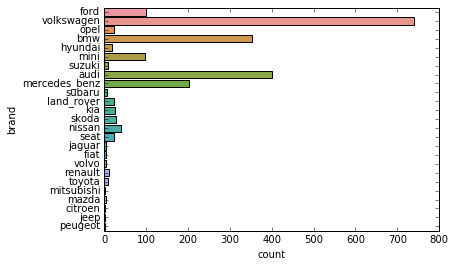

In [40]:
sns.countplot(data=dF, y='brand')
plt.show()

* по типам кузова

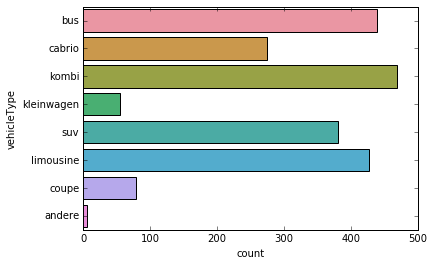

In [41]:
sns.countplot(data=dF, y='vehicleType')
plt.show()

* по используемому топливу

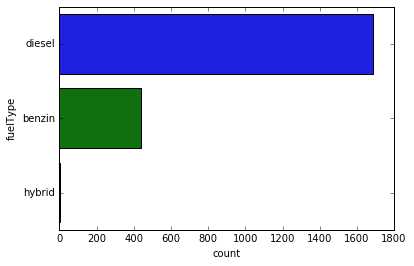

In [42]:
sns.countplot(data=dF, y='fuelType')
plt.show()

### 6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.

In [43]:
Length = str(dF['name'])[:3659].split("\n")
for i in Length:
    i = i[6:]
    i = i.strip()
    print(i)
    print(len(i))
    Length = dF.assign(longname=pd.Series(len(i), index = dF.index))
Length

Ford_Galaxy_2.0_TDCI_Trend_EZ_04.12_Anhaengerk...
49
Volkswagen_Golf_Cabrio_1.4_TSI
30
Ford_Galaxy_2.0_TDCi_DPF_Aut._Titanium_GROSS_NAVI
49
Opel_Astra_1.4_Turbo_Sports_Tourer_ecoFLEX_Sta...
49
BMW_318d_DPF_Touring_Aut.
25
BMW_318d_DPF_Touring_Aut._Leder_Navi_AHK
40
Hyundai_i40cw_1.7_CRDi_Automatik
32
Volkswagen_T5_California_Beach__gepflegt_aus_1...
49
BMW_118
7
VW_Bus_T5__Caravelle_TDI
24
MINI_Mini_Cooper_Automatik_Bayswater
36
BMW_318d_DPF_Touring
20
Suzuki_Grand_Vitara_1.9_DDiS_Comfort+_DPF_AHK_...
49
Audi_A4_Avant_2.0_TDI_Ambition__XenonPlus_Navi...
49
Mercedes_Benz_A_180__BlueEFFICIENCY_
36
Subaru_Forester_2.0D
20
Opel_Zafira_Tourer_1.4_Turbo_ecoFLEX_Start/Sto...
49
Ford_Kuga_2.0_TDCi_4x4
22
BMW_318i_Edition_Sport_M_Paket_Navi_Xenon_Lede...
49
BMW_318d
8
BMW_118d___DVD_Navi___Leder___Service&Reifen&T...
49
Volkswagen__Golf_Cabriolet_Exclusive
36
Audi_A3_Cabriolet_2.0_TDI_DPF_Attraction
40
Volkswagen_Sharan_2.0_TDI_4Motion_BlueMotion__...
49
BMW_BMW_118i_Cabrio_Aut._Leder_fast_Voll

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,longname
500,Ford_Galaxy_2.0_TDCI_Trend_EZ_04.12_Anhaengerk...,16500,test,bus,2012,manuell,140,galaxy,80000,4,diesel,ford,nein,49
776,Volkswagen_Golf_Cabrio_1.4_TSI,18000,control,cabrio,2012,manuell,122,golf,20000,6,benzin,volkswagen,nein,49
801,Ford_Galaxy_2.0_TDCi_DPF_Aut._Titanium_GROSS_NAVI,15900,test,bus,2011,automatik,140,galaxy,125000,4,diesel,ford,nein,49
1393,Opel_Astra_1.4_Turbo_Sports_Tourer_ecoFLEX_Sta...,16990,test,kombi,2012,manuell,140,astra,40000,7,benzin,opel,nein,49
2048,BMW_318d_DPF_Touring_Aut.,15799,test,kombi,2011,automatik,143,3er,150000,3,diesel,bmw,nein,49
2059,BMW_318d_DPF_Touring_Aut._Leder_Navi_AHK,15700,test,kombi,2011,automatik,143,3er,100000,6,diesel,bmw,nein,49
2064,Hyundai_i40cw_1.7_CRDi_Automatik,17900,test,kombi,2012,automatik,136,i_reihe,60000,5,diesel,hyundai,nein,49
2066,Volkswagen_T5_California_Beach__gepflegt_aus_1...,35890,test,bus,2012,manuell,140,transporter,90000,9,diesel,volkswagen,nein,49
2140,BMW_118,19450,test,cabrio,2011,manuell,143,1er,90000,1,benzin,bmw,nein,49
2771,VW_Bus_T5__Caravelle_TDI,17500,control,bus,2009,manuell,131,transporter,150000,1,diesel,volkswagen,nein,49


### 7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.

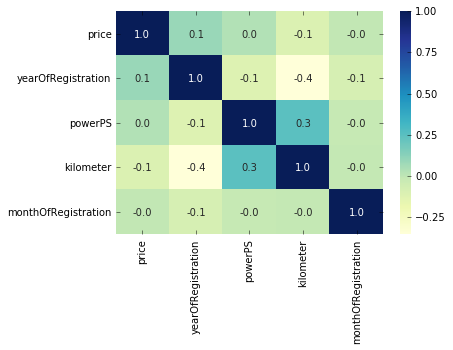

In [44]:
correlation_heatmap = dF.corr()
sns.heatmap(correlation_heatmap, cmap = 'YlGnBu', annot=True, fmt='.1f')
plt.plot()
plt.show()

### 8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.

In [45]:
#preobrazovanie strokovyh znacheniy k chislovym
dF['vehicleType']=dF['vehicleType'].apply({'andere':0,'bus':1,'cabrio':2,'coupe':3,'kleinwagen':4,'kombi':5,'limousine':6,'suv':7}.get)
dF

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
500,Ford_Galaxy_2.0_TDCI_Trend_EZ_04.12_Anhaengerk...,16500,test,1,2012,manuell,140,galaxy,80000,4,diesel,ford,nein
776,Volkswagen_Golf_Cabrio_1.4_TSI,18000,control,2,2012,manuell,122,golf,20000,6,benzin,volkswagen,nein
801,Ford_Galaxy_2.0_TDCi_DPF_Aut._Titanium_GROSS_NAVI,15900,test,1,2011,automatik,140,galaxy,125000,4,diesel,ford,nein
1393,Opel_Astra_1.4_Turbo_Sports_Tourer_ecoFLEX_Sta...,16990,test,5,2012,manuell,140,astra,40000,7,benzin,opel,nein
2048,BMW_318d_DPF_Touring_Aut.,15799,test,5,2011,automatik,143,3er,150000,3,diesel,bmw,nein
2059,BMW_318d_DPF_Touring_Aut._Leder_Navi_AHK,15700,test,5,2011,automatik,143,3er,100000,6,diesel,bmw,nein
2064,Hyundai_i40cw_1.7_CRDi_Automatik,17900,test,5,2012,automatik,136,i_reihe,60000,5,diesel,hyundai,nein
2066,Volkswagen_T5_California_Beach__gepflegt_aus_1...,35890,test,1,2012,manuell,140,transporter,90000,9,diesel,volkswagen,nein
2140,BMW_118,19450,test,2,2011,manuell,143,1er,90000,1,benzin,bmw,nein
2771,VW_Bus_T5__Caravelle_TDI,17500,control,1,2009,manuell,131,transporter,150000,1,diesel,volkswagen,nein


In [46]:
#значение корреляции Пирсона
dF['price'].corr(dF['vehicleType'])

-0.14564421056014329

In [47]:
#значение корреляции Спирмена
stats.spearmanr(dF['price'],dF['vehicleType'])[0]

-0.09198988541448018

In [48]:
#значение p-value
stats.spearmanr(dF['price'],dF['vehicleType'])[1]

2.1565194355509254e-05

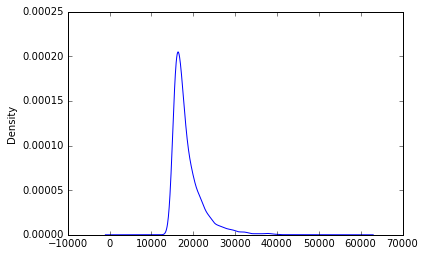

In [49]:
dF['price'].plot.kde()
plt.show()

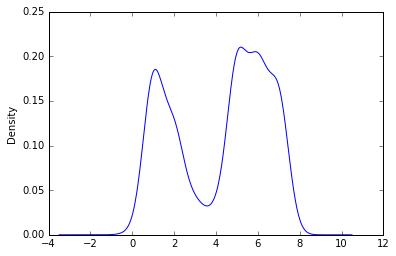

In [50]:
dF['vehicleType'].plot.kde()
plt.show()

In [51]:
#obratnoe preobrazovanie k strokovym znacheniyam
dF['vehicleType']=dF['vehicleType'].apply({0:'andere',1:'bus',2:'cabrio',3:'coupe',4:'kleinwagen',5:'kombi',6:'limousine',7:'suv'}.get)

### 9. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [52]:
dF["new"]= dF["yearOfRegistration"]+dF["powerPS"]
dF.head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,new
500,Ford_Galaxy_2.0_TDCI_Trend_EZ_04.12_Anhaengerk...,16500,test,bus,2012,manuell,140,galaxy,80000,4,diesel,ford,nein,2152
776,Volkswagen_Golf_Cabrio_1.4_TSI,18000,control,cabrio,2012,manuell,122,golf,20000,6,benzin,volkswagen,nein,2134
801,Ford_Galaxy_2.0_TDCi_DPF_Aut._Titanium_GROSS_NAVI,15900,test,bus,2011,automatik,140,galaxy,125000,4,diesel,ford,nein,2151
1393,Opel_Astra_1.4_Turbo_Sports_Tourer_ecoFLEX_Sta...,16990,test,kombi,2012,manuell,140,astra,40000,7,benzin,opel,nein,2152
2048,BMW_318d_DPF_Touring_Aut.,15799,test,kombi,2011,automatik,143,3er,150000,3,diesel,bmw,nein,2154
